Joshua Lijo

VIT Chennai

21BPS1176

Assignment 5

Task 1: Understanding the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
import plotly.offline as py

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape


(200, 5)

In [4]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Task 2: Data preprocessing including visualization

<Axes: ylabel='Frequency'>

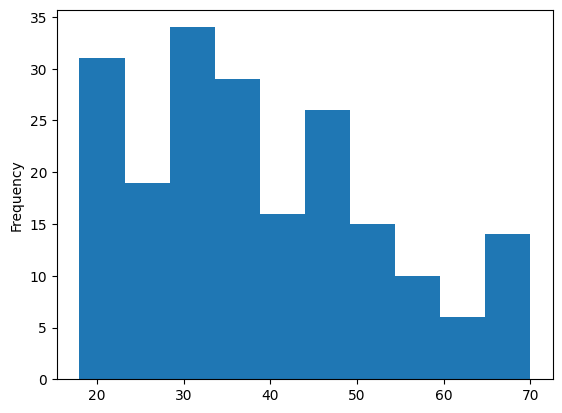

In [6]:
#Univariate Analysis (Analysis on single feature 'Age')
df['Age'].plot.hist()

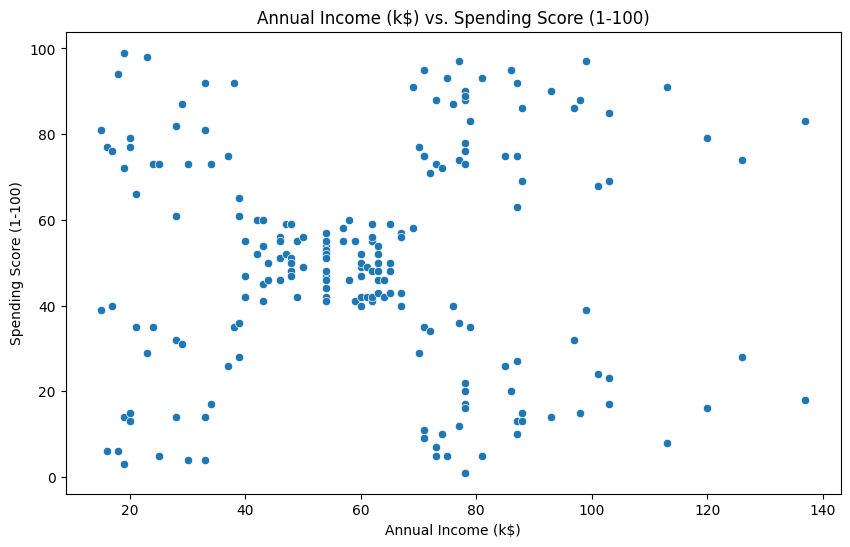

In [7]:
#Bivariate Analysis (Comparison between 'Annual Income' feature and 'Spending Score' feature
x_variable = "Annual Income (k$)"
y_variable = "Spending Score (1-100)"

# Scatter plot for bivariate analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_variable, y=y_variable)
plt.xlabel(x_variable)
plt.ylabel(y_variable)
plt.title(f"{x_variable} vs. {y_variable}")
plt.show()

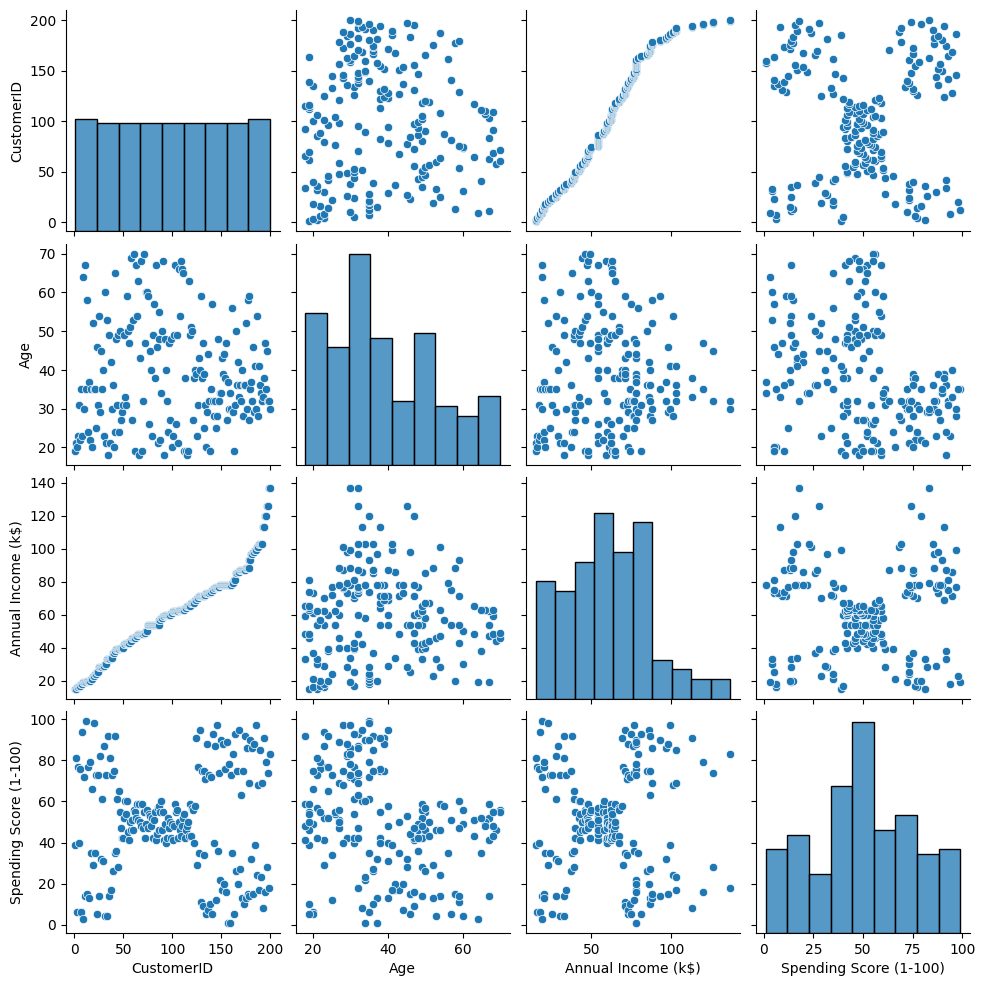

In [8]:
#Multivariate Analysis
sns.pairplot(df)

<ipython-input-9-5927c2bf1f17>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



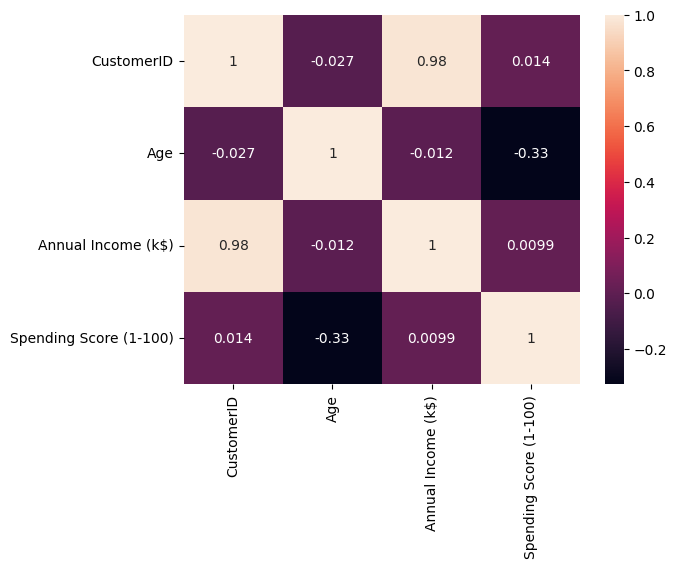

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Task 3: Machine Learning approach with clustering algorithm

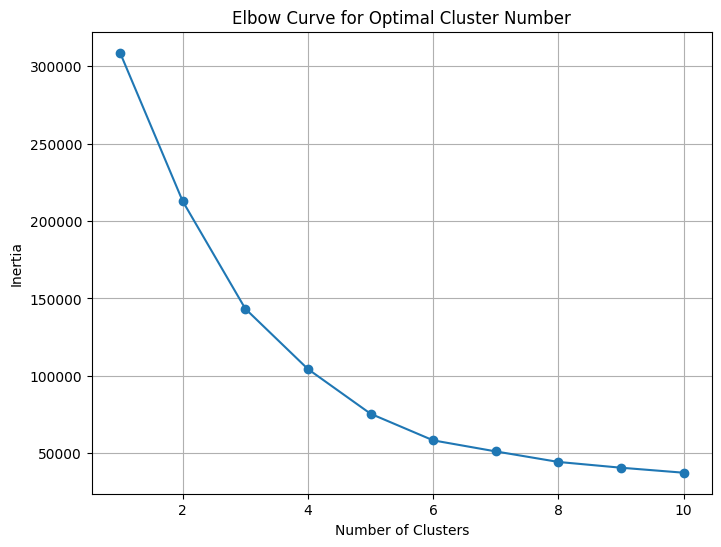

In [10]:
X3 = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Initialize an empty list to store inertia values
inertia = []

# Define the range of cluster numbers you want to test
for n_clusters in range(1, 11):
    # Create a KMeans instance with the specified parameters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300,
                    tol=0.0001, random_state=111, algorithm='lloyd')

    # Fit the KMeans model to your data
    kmeans.fit(X3)

    # Append the inertia (within-cluster sum of squares) to the list
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

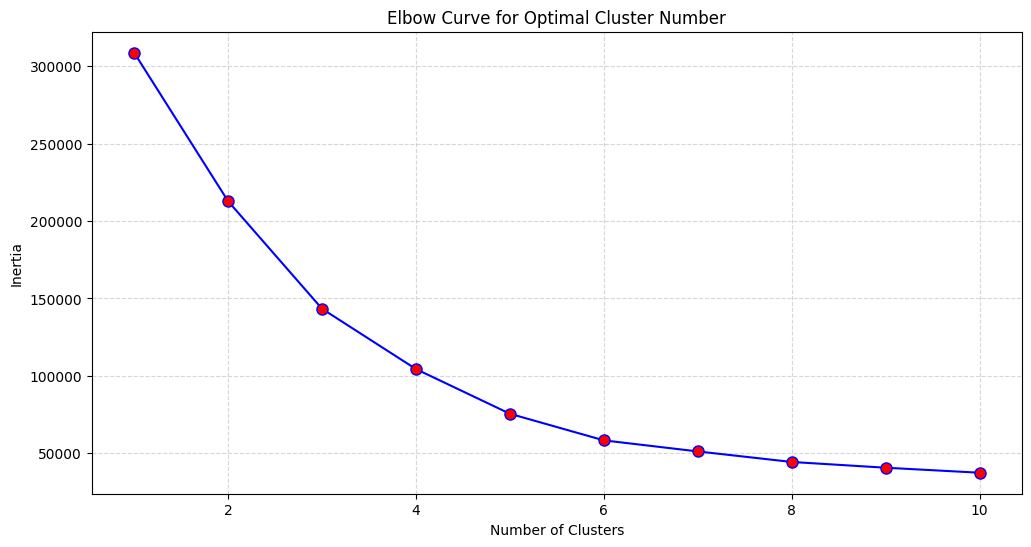

In [11]:
# Customize the appearance of the plot
plt.figure(figsize=(12, 6))  # Adjust the figure size

# Use markers and lines for the plot
plt.plot(np.arange(1, 11), inertia, marker='o', linestyle='-', color='b', markerfacecolor='r', markersize=8)

# Add a title and labels
plt.title('Elbow Curve for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [12]:
n_clusters = 6

# Create a KMeans instance with specified parameters
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300,
                tol=0.0001, random_state=111, algorithm='elkan')

# Fit the KMeans model to your data
kmeans.fit(X3)

# Retrieve cluster labels and centroids
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

In [13]:
# Assign cluster labels to a new column in the dataframe
df['label3'] = labels3

# Define the trace for the scatter plot
trace1 = go.Scatter(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    mode='markers',
    marker=dict(
        color=df['label3'],
        size=12,  # Adjust marker size as needed
        opacity=0.8
    )
)

# Create data and layout lists
data = [trace1]
layout = go.Layout(
    title='2D Scatter Plot with Clusters',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Spending Score')
)

# Create the figure and plot it
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)